## Python Plot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm # -> for QQ plot
from statsmodels.graphics.mosaicplot import mosaic # -> for mosaic plot

path = "../src/"

stud_pref = pd.read_csv(path + "data/student/student-mat.csv", sep=";")
# stud_pref = pd.read_csv(path + "data/student/student-mat.csv", delimiter=";")
# sep="," by default
concrete = pd.read_csv(path + "data/concrete+slump+test/slump_test.data")

#### Discribe

dataframe.describe(percentiles, include, exclude, datetime_is_numeric)

In [3]:
stud_pref.G3.describe() # -> information

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [4]:
stud_pref[['Medu', 'G3']].describe()

,Medu,G3
count,395.000000,395.000000
mean,2.749367,10.415190
std,1.094735,4.581443
min,0.000000,0.000000
25%,2.000000,8.000000
50%,3.000000,11.000000
75%,4.000000,14.000000
max,4.000000,20.000000


In [5]:
stud_pref[['Medu', 'G3']].groupby('Medu').describe()

G3                                                  
      count       mean       std  min   25%   50%   75%   max
Medu                                                         
0       3.0  13.000000  3.464102  9.0  12.0  15.0  15.0  15.0
1      59.0   8.677966  4.364594  0.0   7.5  10.0  11.0  16.0
2     103.0   9.728155  4.636163  0.0   8.0  11.0  13.0  19.0
3      99.0  10.303030  4.623486  0.0   8.0  10.0  13.0  19.0
4     131.0  11.763359  4.267646  0.0   9.5  12.0  15.0  20.0

In [6]:
stud_pref[['Medu', 'G3', 'G1']].groupby('Medu').describe()

G3                                                       G1  \
      count       mean       std  min   25%   50%   75%   max  count   
Medu                                                                   
0       3.0  13.000000  3.464102  9.0  12.0  15.0  15.0  15.0    3.0   
1      59.0   8.677966  4.364594  0.0   7.5  10.0  11.0  16.0   59.0   
2     103.0   9.728155  4.636163  0.0   8.0  11.0  13.0  19.0  103.0   
3      99.0  10.303030  4.623486  0.0   8.0  10.0  13.0  19.0   99.0   
4     131.0  11.763359  4.267646  0.0   9.5  12.0  15.0  20.0  131.0   

                                                        
           mean       std  min   25%   50%   75%   max  
Medu                                                    
0     12.000000  4.582576  7.0  10.0  13.0  14.5  16.0  
1      9.745763  3.043326  5.0   8.0   9.0  12.0  18.0  
2     10.563107  2.939487  5.0   8.0  10.0  12.0  18.0  
3     10.606061  3.519097  3.0   7.0  11.0  13.0  18.0  
4     11.908397  3.317669  5.0  10.0  12.0  14.5  19.0

#### info

Prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [7]:
stud_pref.G3.info()

<class 'pandas.core.series.Series'>
RangeIndex: 395 entries, 0 to 394
Series name: G3
Non-Null Count  Dtype
--------------  -----
395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


### Histogram

Text(0.5, 1.0, 'G3 Histogram')

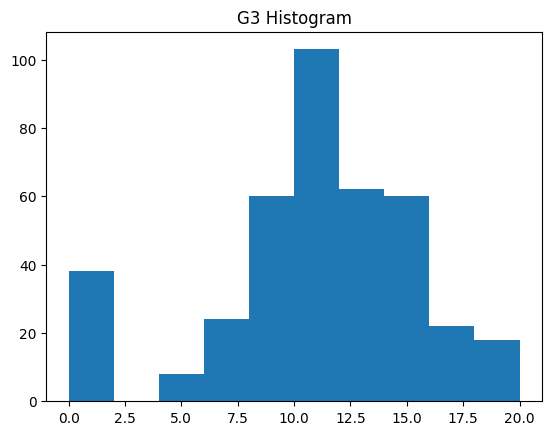

In [8]:
fig = stud_pref.G3.hist(grid=False)
fig.set_title('G3 Histogram')

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: >]], dtype=object)

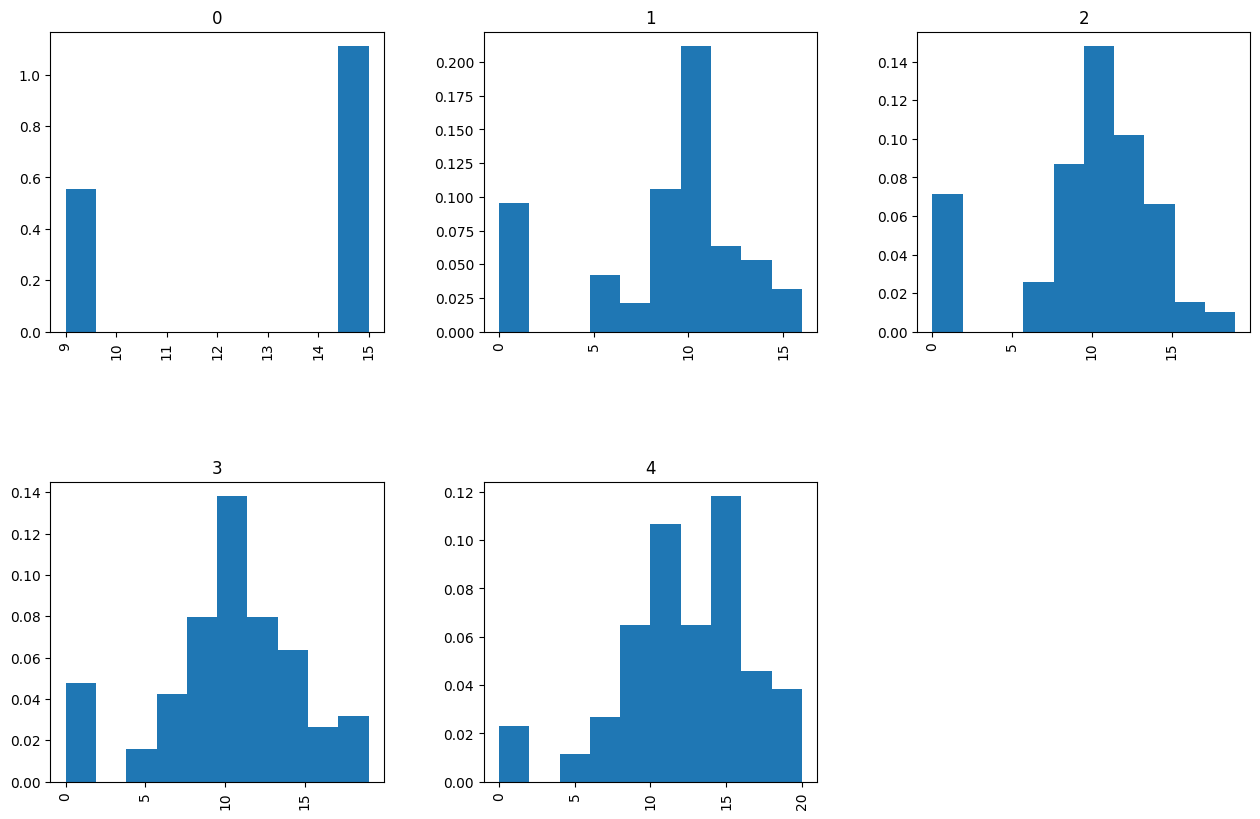

In [9]:
stud_pref.G3.hist(by=stud_pref.Medu, figsize=(15, 10), density=True, layout=(2,3))

array([[<Axes: title={'center': 'G1'}>, <Axes: title={'center': 'G2'}>,
        <Axes: title={'center': 'G3'}>]], dtype=object)

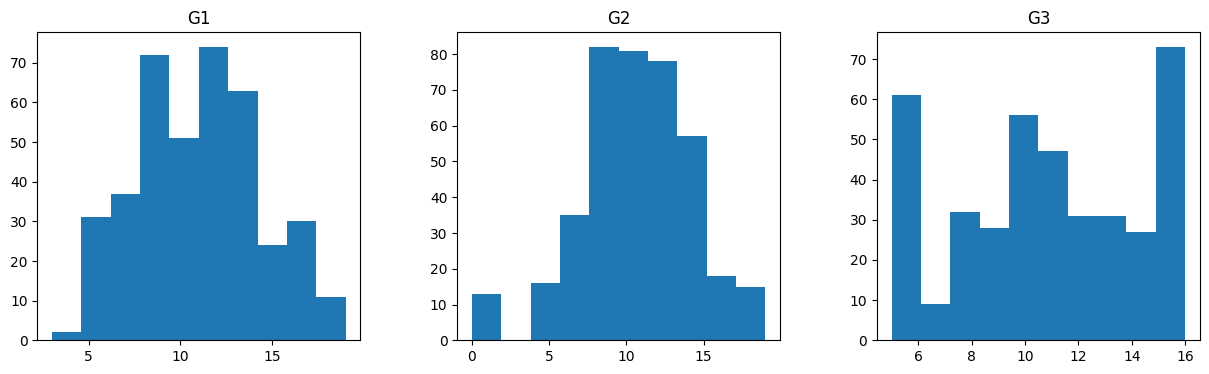

In [35]:
stud_pref[['G1', 'G2', 'G3']].hist(layout=(1,3), figsize=(15,4), grid=False)

#### Density Plots

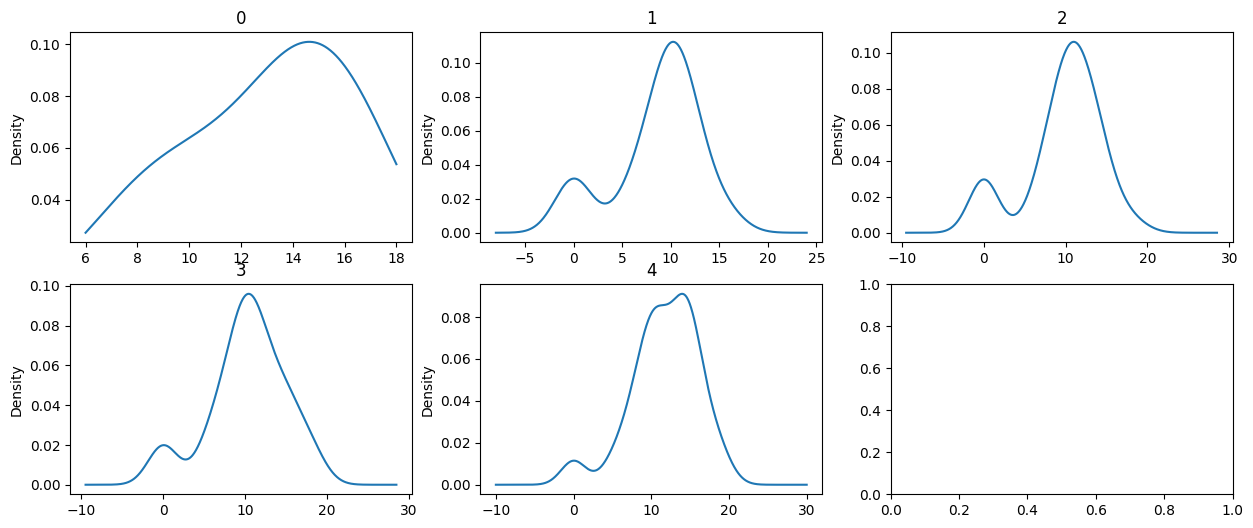

In [10]:
fig, axs = plt.subplots(2, 3, squeeze=False, figsize=(15, 6))
out2 = stud_pref.groupby("Medu")
for index, df in enumerate(out2):
    # df[0] -> value of Medu, df[1] -> dataframe
    tmp = plt.subplot(2, 3, index+1) # subplot(nrows, ncols, position index)
    df[1].G3.plot(kind='kde')
    tmp.set_title(df[0])

#### Boxplots

G3    Axes(0.125,0.11;0.775x0.77)
dtype: object

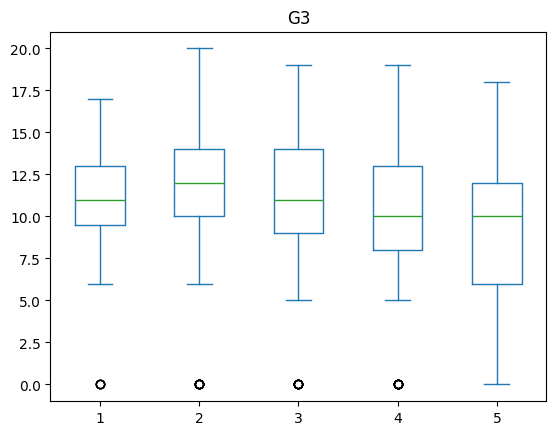

In [11]:
stud_pref.plot.box(column='G3', by='goout')

#### QQ Plot

In [12]:
concrete

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
...,...,...,...,...,...,...,...,...,...,...,...
98,99,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
99,100,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
100,101,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
101,102,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0,49.17


In [13]:
concrete.rename(columns={'No': 'id', 'Compressive Strength (28-day)(Mpa)': 'Comp_Strength'}, inplace=True)

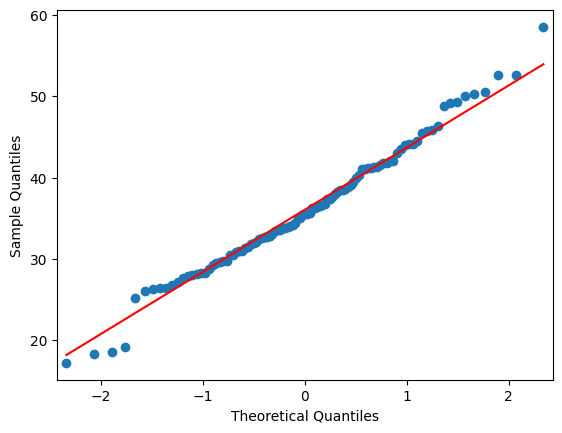

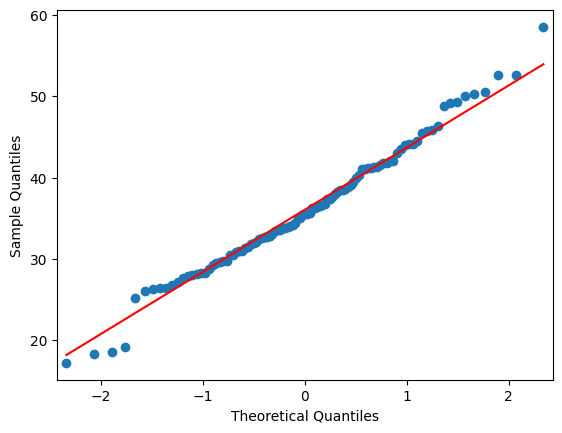

In [14]:
sm.qqplot(concrete.Comp_Strength, line='q')

#### Scatterplot Matrices

array([[<Axes: xlabel='Cement', ylabel='Cement'>,
        <Axes: xlabel='Slag', ylabel='Cement'>,
        <Axes: xlabel='Water', ylabel='Cement'>,
        <Axes: xlabel='SLUMP(cm)', ylabel='Cement'>,
        <Axes: xlabel='FLOW(cm)', ylabel='Cement'>],
       [<Axes: xlabel='Cement', ylabel='Slag'>,
        <Axes: xlabel='Slag', ylabel='Slag'>,
        <Axes: xlabel='Water', ylabel='Slag'>,
        <Axes: xlabel='SLUMP(cm)', ylabel='Slag'>,
        <Axes: xlabel='FLOW(cm)', ylabel='Slag'>],
       [<Axes: xlabel='Cement', ylabel='Water'>,
        <Axes: xlabel='Slag', ylabel='Water'>,
        <Axes: xlabel='Water', ylabel='Water'>,
        <Axes: xlabel='SLUMP(cm)', ylabel='Water'>,
        <Axes: xlabel='FLOW(cm)', ylabel='Water'>],
       [<Axes: xlabel='Cement', ylabel='SLUMP(cm)'>,
        <Axes: xlabel='Slag', ylabel='SLUMP(cm)'>,
        <Axes: xlabel='Water', ylabel='SLUMP(cm)'>,
        <Axes: xlabel='SLUMP(cm)', ylabel='SLUMP(cm)'>,
        <Axes: xlabel='FLOW(cm)', ylabel='SL

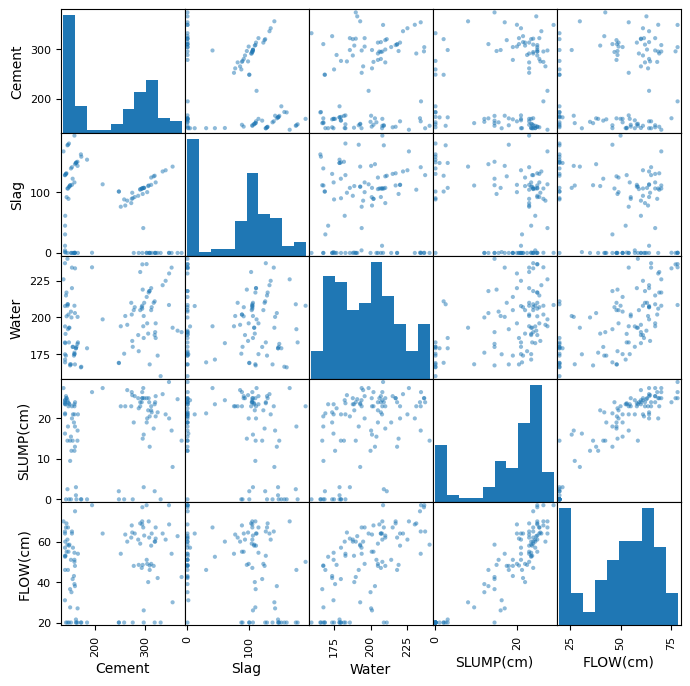

In [15]:
pd.plotting.scatter_matrix(concrete[['Cement', 'Slag', 'Water', 'SLUMP(cm)', 'FLOW(cm)']], figsize=(8,8))

#### Correlation Plot

In [16]:
corr = concrete[['Cement', 'Slag', 'Water', 'SLUMP(cm)', 'FLOW(cm)']].corr()
corr.style.background_gradient(cmap='coolwarm_r')

,Cement,Slag,Water,SLUMP(cm),FLOW(cm)
Cement,1.000000,-0.243553,0.221091,0.145913,0.186461
Slag,-0.243553,1.000000,-0.026775,-0.284037,-0.327231
Water,0.221091,-0.026775,1.000000,0.466568,0.632026
SLUMP(cm),0.145913,-0.284037,0.466568,1.000000,0.906135
FLOW(cm),0.186461,-0.327231,0.632026,0.906135,1.000000


#### Contingency Table

In [17]:
tab = np.array([[4, 184], [2, 260]])
prop = tab / tab.sum(axis=1).reshape((2,1)) # need to reshape sum(axis=1) as it return a vector in shape (1,2)
xx = pd.DataFrame(prop, columns=['nervous', 'not nervous'], index=['claritin', 'placebo'])
xx

,nervous,not nervous
claritin,0.021277,0.978723
placebo,0.007634,0.992366


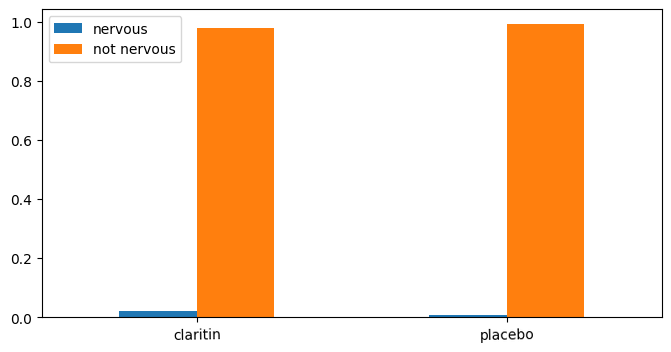

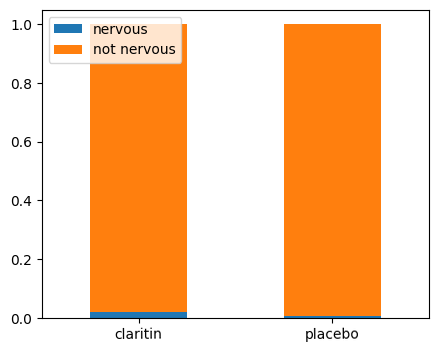

In [18]:
ax = xx.plot(kind='bar', stacked=False, rot=1.0, figsize=(8,4))
ax = xx.plot(kind='bar', stacked=True, rot=0.5, figsize=(5,4))
ax.legend(loc='upper left')

#### Mosaic Plot

(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0,
   np.float64(0.0),
   0.5378517021607336,
   np.float64(0.45881502890173415)),
  ('0', '1'): (0.0,
   np.float64(0.4900650289017341),
   0.5378517021607336,
   np.float64(0.19689306358381506)),
  ('0', '2'): (0.0,
   np.float64(0.7182080924855492),
   0.5378517021607336,
   np.float64(0.2817919075144508)),
  ('1', '0'): (0.5854707497797813,
   np.float64(0.0),
   0.4145292502202187,
   np.float64(0.378125)),
  ('1', '1'): (0.5854707497797813,
   np.float64(0.409375),
   0.4145292502202187,
   np.float64(0.18671875000000004)),
  ('1', '2'): (0.5854707497797813,
   np.float64(0.62734375),
   0.4145292502202187,
   np.float64(0.37265624999999997))})

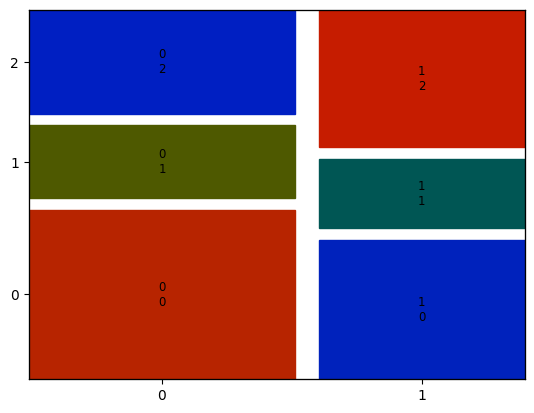

In [19]:
political_tab = np.asarray([[762,327,468], [484,239,477]])
mosaic(political_tab, statistic=True, gap=0.05)

#### $\chi^2$-Test

$$H_0: \text{The two variables are independent}$$
$$H_1: \text{The two variables are not independent}$$

Set Significance level $5\%$

- If $p-\text{value} < 0.05$, Reject $H_0$, The two variables are not independent.
- If $p-\text{value} > 0.05$, not enough evidence to reject $H_0$, The two variables are independent.

In [20]:
chest_array = np.array([[46, 474], [37, 516]])
chisq_output = stats.chi2_contingency(chest_array)
chisq_output.pvalue # pvalue
chisq_output.statistic # test statistic value
chisq_output.expected_freq # expected cell counts

array([[ 40.22367195, 479.77632805],
       [ 42.77632805, 510.22367195]])

$\chi^2$ Test for $r\times c $ table

In [21]:
rc = np.array([[46, 474], [37, 516], [50, 75]])
rc_output = stats.chi2_contingency(rc)
rc_output.pvalue

np.float64(1.2098894351367673e-26)

#### Fisher Test

When there exists expected cell counts are less than 5, use Fisher Test instead of $\chi^2$

In [22]:
tab = np.array([[4, 184], [2, 260]])
fisher_output = stats.fisher_exact(tab)
fisher_output.statistic
fisher_output.pvalue

np.float64(0.24118420183193057)

#### Odds Ratio

In [23]:
chest_tab2 = sm.stats.Table2x2(chest_array)
chest_tab2.summary()
# odds ratio is 1.353

,Estimate,SE,LCB,UCB,p-value
Odds ratio,1.353,,0.863,2.123,0.188
Log odds ratio,0.303,0.230,-0.148,0.753,0.188
Risk ratio,1.322,,0.872,2.004,0.188
Log risk ratio,0.279,0.212,-0.137,0.695,0.188


#### $\gamma, \tau$ for Ordinal Variable

In [24]:
us_svy_tab = np.array([[1, 3, 10, 6], 
                      [2, 3, 10, 7],
                      [1, 6, 14, 12],
                      [0, 1,  9, 11]])

dim1 = us_svy_tab.shape
x = []; y=[]
for i in range(0, dim1[0]):
    for j in range(0, dim1[1]):
        for k in range(0, us_svy_tab[i,j]):
            x.append(i)
            y.append(j)
            
kt_output = stats.kendalltau(x, y)
print(f"The estimate of tau-b is {kt_output.statistic:.4f}.")

The estimate of tau-b is 0.1524.


#### Trimed Mean

In [27]:
stats.trim_mean(stud_pref.G3, proportiontocut=0.1)

np.float64(10.842271293375394)

#### Winsorize Mean

In [28]:
stats.mstats.winsorize(stud_pref.G3, limits=0.1).mean()

np.float64(10.774683544303798)

#### Standard Deviation

In [31]:
stud_pref.G3.std()

np.float64(3.3933896756741886)

#### MAD

$$\hat{\sigma} = \frac{1}{0.6745} MAD(X)$$

In [29]:
stats.median_abs_deviation(stud_pref.G3)

np.float64(3.0)

#### IQR

$$\hat{\sigma} = \frac{1}{1.35} IQR $$

In [33]:
stats.iqr(stud_pref.G3)

np.float64(6.0)